### Aditya Jindal
### Batch M6
### Assingment 3

# **Import Libraries and modules**

In [1]:
# https://keras.io/
# Installing Keras
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing required libraries
import numpy as np
import math
from keras.models import Model,Sequential
from keras.layers import Activation, Flatten, Input, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
#Loading greyscale handwritten digit dataset images and labels to colab
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


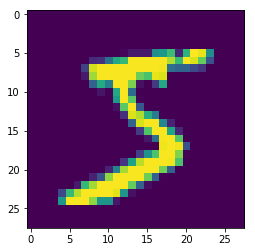

In [4]:
# Printing the first image and shape of the image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# reshaping images to get a single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Converting to float and normalizing ixel value to be btw 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Declaring the sequential model
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(8, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(10, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 8)         264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2336      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
__________

In [0]:
# Defining the loss function and optimiser

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# Training the model
model.fit(X_train, Y_train, batch_size=128, epochs = 25, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 17s 282us/step - loss: 1.1386 - acc: 0.5948 - val_loss: 0.3256 - val_acc: 0.8992
Epoch 2/25
60000/60000 [==============================] - 12s 196us/step - loss: 0.2403 - acc: 0.9269 - val_loss: 0.1566 - val_acc: 0.9558
Epoch 3/25
60000/60000 [==============================] - 13s 210us/step - loss: 0.1522 - acc: 0.9533 - val_loss: 0.2037 - val_acc: 0.9414
Epoch 4/25
60000/60000 [==============================] - 12s 196us/step - loss: 0.1185 - acc: 0.9634 - val_loss: 0.1067 - val_acc: 0.9682
Epoch 5/25
60000/60000 [==============================] - 12s 195us/step - loss: 0.0998 - acc: 0.9692 - val_loss: 0.0959 - val_acc: 0.9739
Epoch 6/25
60000/60000 [==============================] - 12s 195us/step - loss: 0.0876 - acc: 0.9727 - val_loss: 0.0954 - val_acc: 0.9735
Epoch 7/25
60000/60000 [==============================] - 12s 196us/

In [0]:
# evaluating the model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.0454450829257723, 0.9874]


In [0]:
# Printing the prediction of label and the actual labels
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.67650735e-10 2.16052115e-07 6.31382454e-06 3.12999447e-07
  7.16088550e-07 8.99008246e-09 4.65631173e-10 9.99992132e-01
  4.21344879e-08 2.99737337e-07]
 [4.35941026e-08 4.53464396e-04 9.99528408e-01 1.84786245e-07
  3.91367507e-07 5.29206409e-06 1.71727584e-06 1.04262244e-05
  1.19670309e-08 1.62547309e-08]
 [7.09057757e-10 9.99985933e-01 3.35162099e-06 9.16679799e-09
  4.73130149e-06 9.32059336e-08 8.03608060e-08 5.58045213e-06
  1.44199674e-08 2.39502697e-07]
 [9.99962568e-01 1.83670309e-07 9.38640241e-08 1.85768283e-06
  1.92295474e-07 3.57586515e-07 3.16417900e-05 3.92919276e-07
  1.25437373e-06 1.46803961e-06]
 [6.90898116e-10 4.09933782e-05 8.26553560e-07 2.81766555e-10
  9.99849677e-01 1.00934558e-08 4.76313033e-07 1.24173257e-05
  5.51387927e-07 9.50972753e-05]
 [1.14779530e-09 9.99971032e-01 7.22052118e-06 1.28270523e-08
  5.38612858e-06 8.42931129e-08 1.85516953e-07 1.51097765e-05
  9.25280972e-08 8.19785214e-07]
 [1.36601693e-06 9.95430513e-04 2.18244342e-04 5.72173531e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

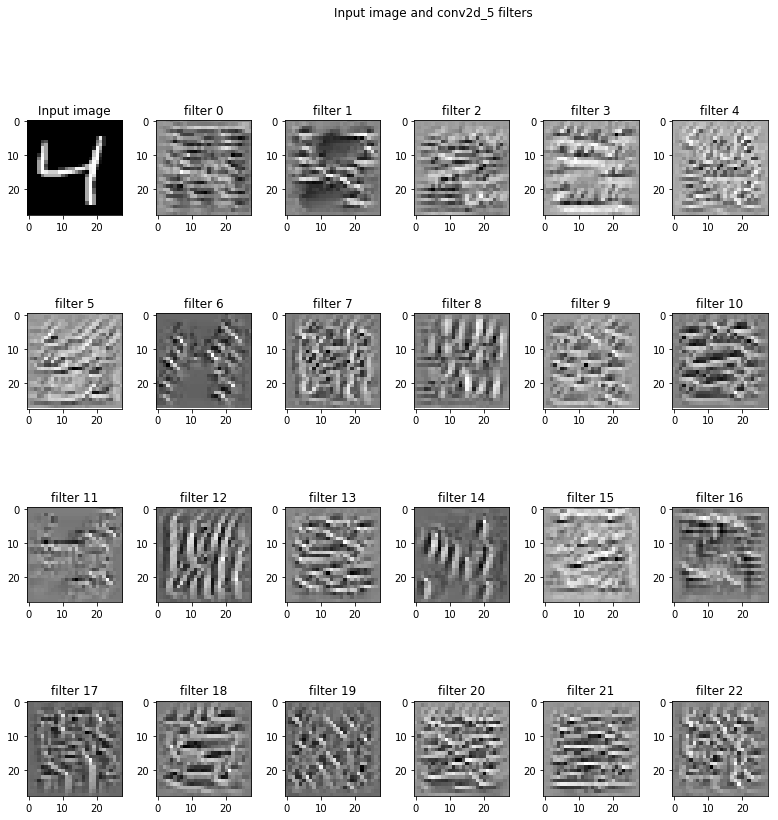

In [20]:
# Visualising kernel at a convolutional layer

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()